### Figure 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import ptitprince as pt
import os

In [ ]:
df = pd.read_excel("Table_3.xlsx")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Taxon     15039 non-null  object 
 1   Rank      15039 non-null  object 
 2   Variance  15039 non-null  float64
dtypes: float64(1), object(2)
memory usage: 352.6+ KB


In [10]:
df.Variance.value_counts()

Variance
1.000000       10301
0.250000         677
0.222222         388
2.250000         141
0.187500         131
               ...  
1660.545455        1
54.204082          1
447.360000         1
2.122449           1
9.888889           1
Name: count, Length: 1580, dtype: int64

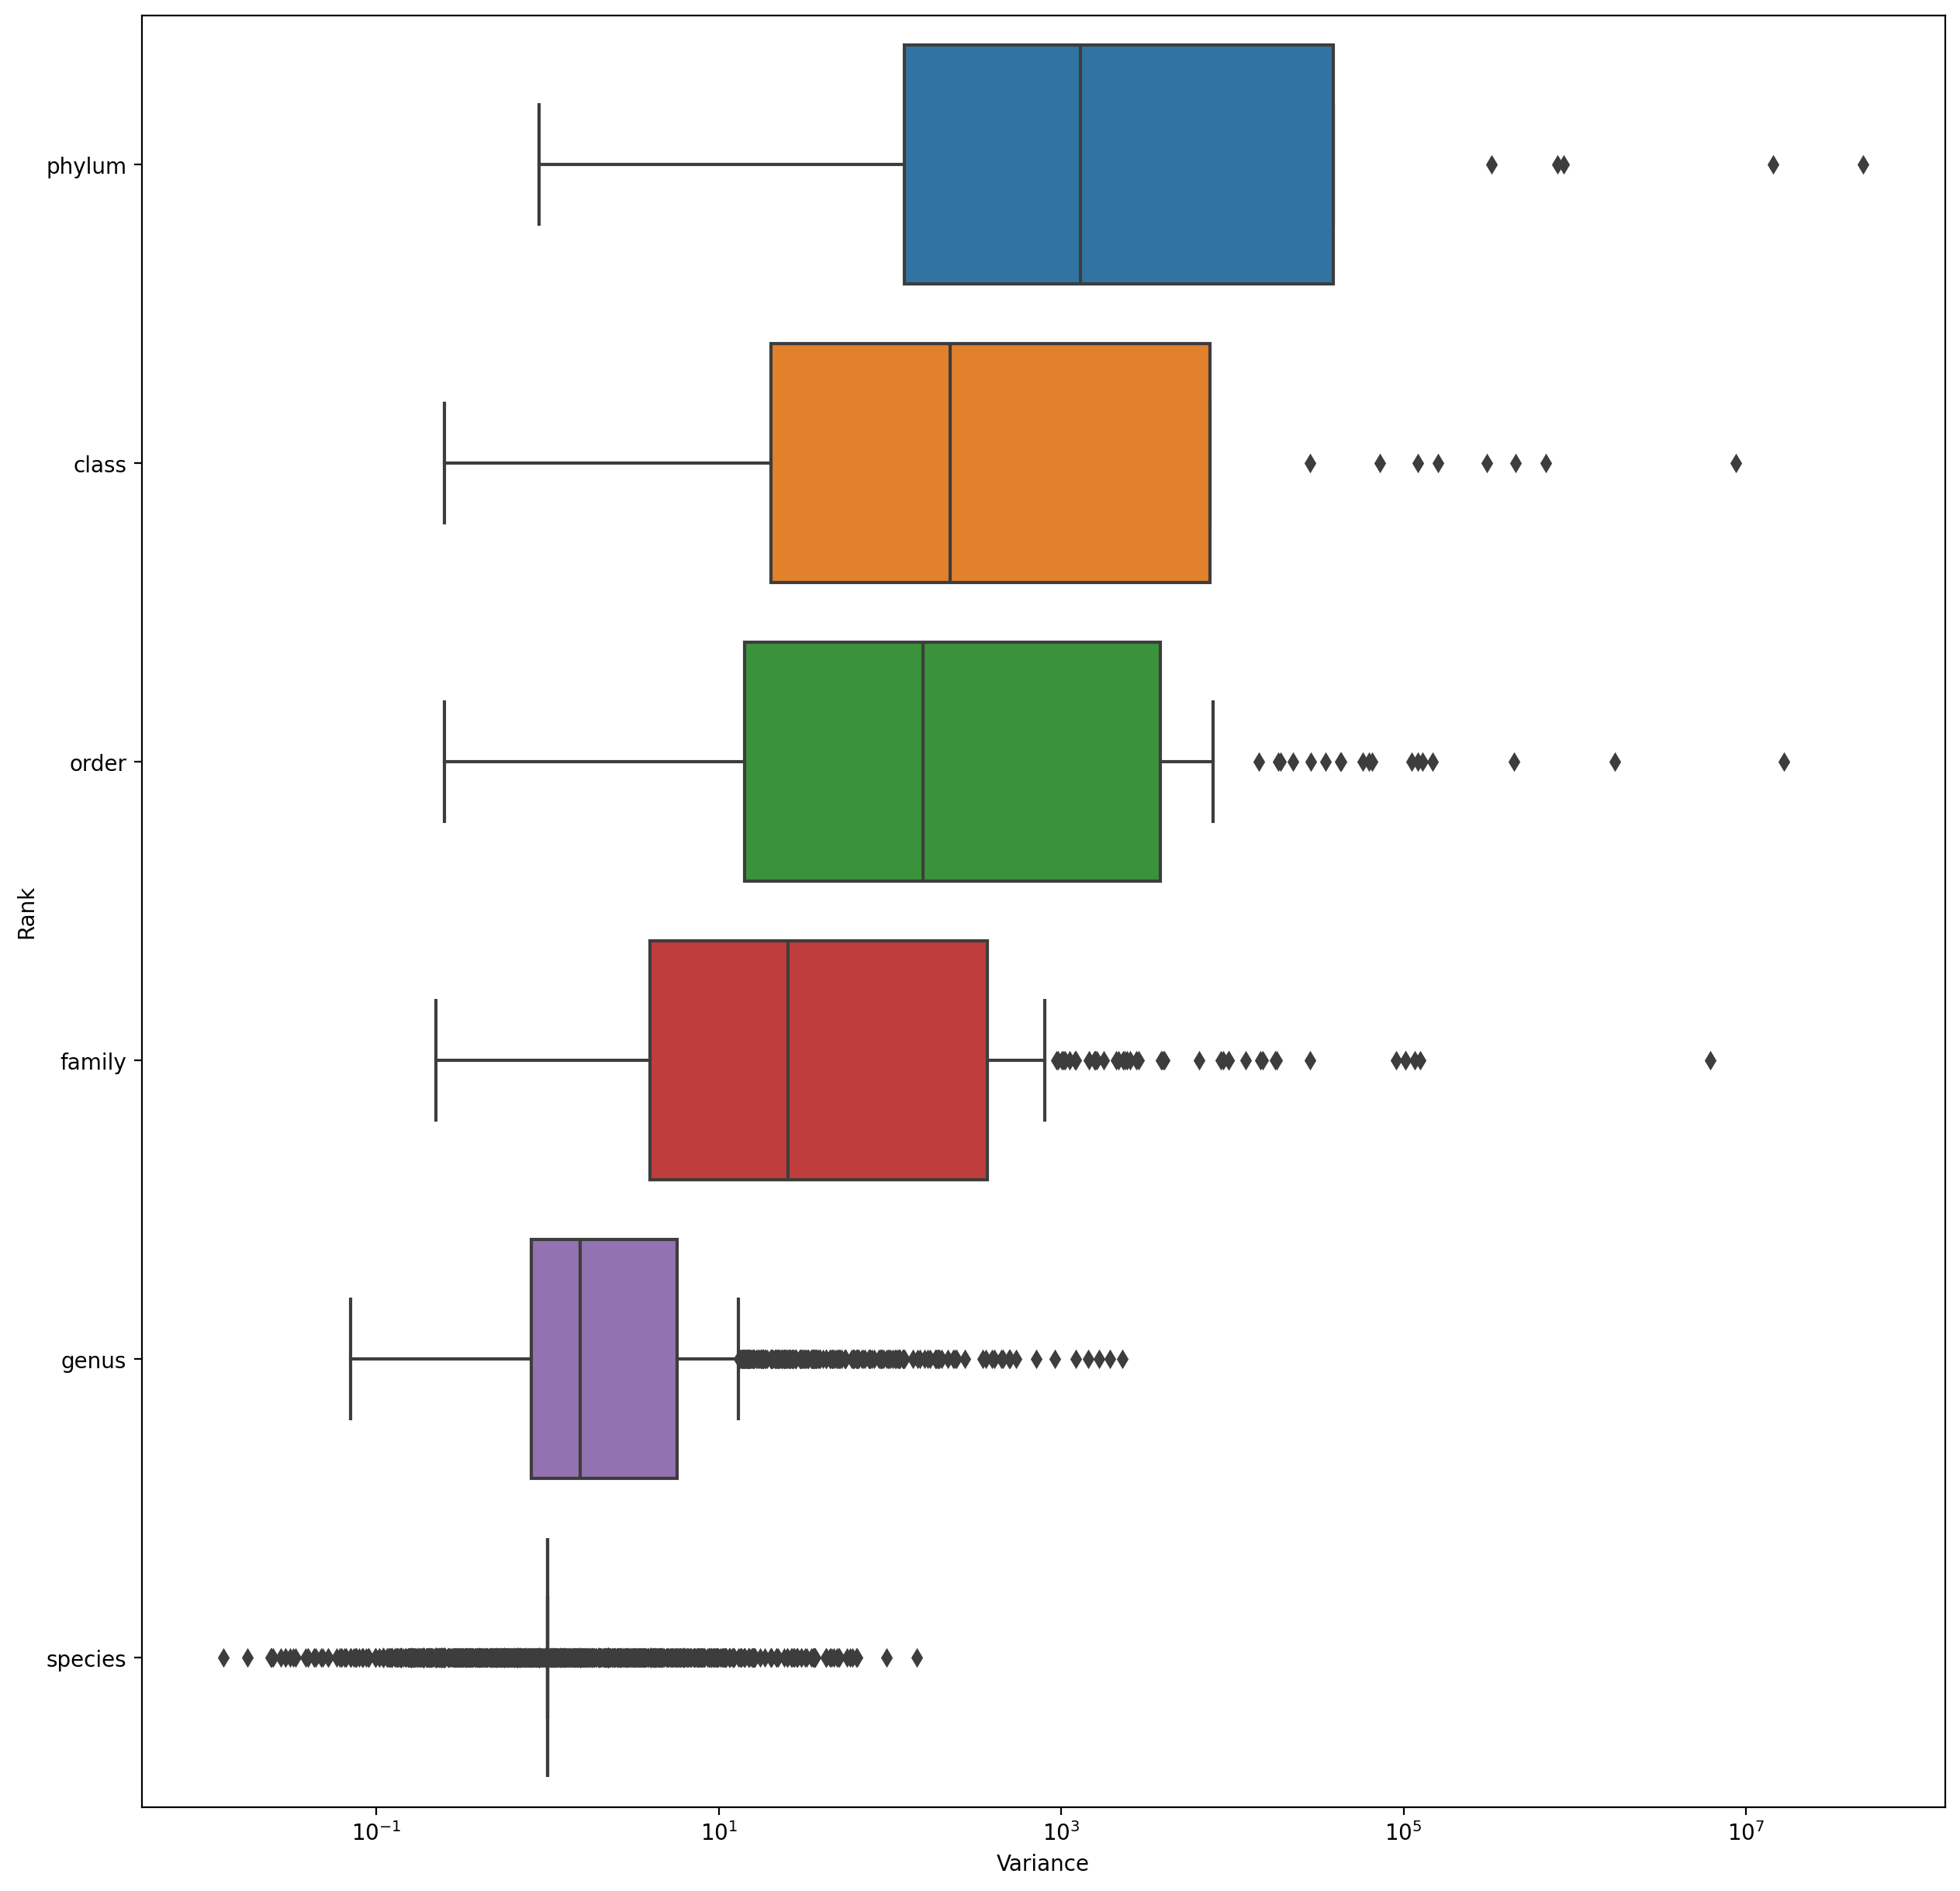

In [16]:
f, ax = plt.subplots(figsize=(15, 15), dpi=200)

ax = sns.boxplot(y = df["Rank"], x = df["Variance"], data = df, orient='h')

ax.set_xscale('log')

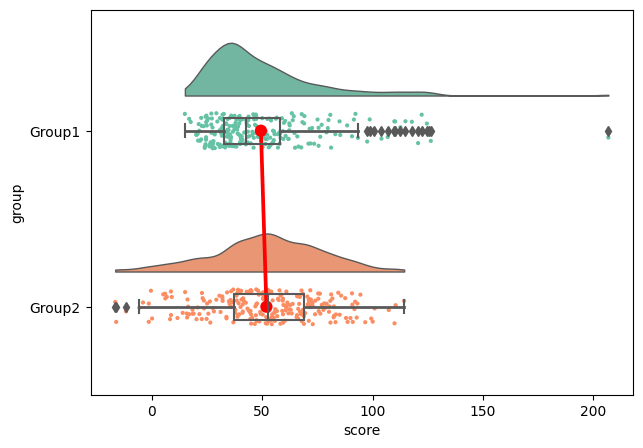

In [22]:
#adding a red line connecting the groups' mean value (useful for longitudinal data)
dx="group"; dy="score"; ort="h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort,
               pointplot = True)

In [1]:
# f, ax = plt.subplots(figsize=(15, 9))
# 
# ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
#             showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
#             showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
#                saturation = 1, orient = ort)
# 
# ax=sns.stripplot( x = dx, y = dy, data = df, palette = sns.color_palette(n_colors=1), edgecolor = "white",
#                  size = 3, jitter = 0, zorder = 0, orient = ort)
# 
# 
# ax.set_xscale('log')

In [2]:
# f, ax = plt.subplots(figsize=(15, 9))
# 
# pal = sns.color_palette(n_colors=1)
# 
# ax=sns.stripplot(x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
#                  size = 3, jitter = 1, zorder = 0, orient = ort, ax = ax )
# 
# ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
#             showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
#             showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
#                saturation = 1, orient = ort,move = .2)
# 
# ax.set_xscale('log')

In [75]:
help(pt.RainCloud)

Help on function RainCloud in module ptitprince.PtitPrince:

RainCloud(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient='v', width_viol=0.7, width_box=0.15, palette='Set2', bw=0.2, linewidth=1, cut=0.0, scale='area', jitter=1, move=0.0, offset=None, point_size=3, ax=None, pointplot=False, alpha=None, dodge=False, linecolor='red', **kwargs)
    Draw a Raincloud plot of measure `y` of different categories `x`. Here `x` and `y` different columns of the pandas dataframe `data`.
    
    A raincloud is made of:
    
        1) "Cloud", kernel desity estimate, the half of a violinplot.
        2) "Rain", a stripplot below the cloud
        3) "Umberella", a boxplot
        4) "Thunder", a pointplot connecting the mean of the different categories (if `pointplot` is `True`)
    
    Main inputs:
        x           categorical data. Iterable, np.array, or dataframe column name if 'data' is specified
        y           measure data. Iterable, np.array, or dataframe colum

In [3]:
# df2["Variance"] = np.log(df2["Variance"])

In [4]:
# df2 = df2[df2["Variance"] != df2["Variance"].iloc[-1]]

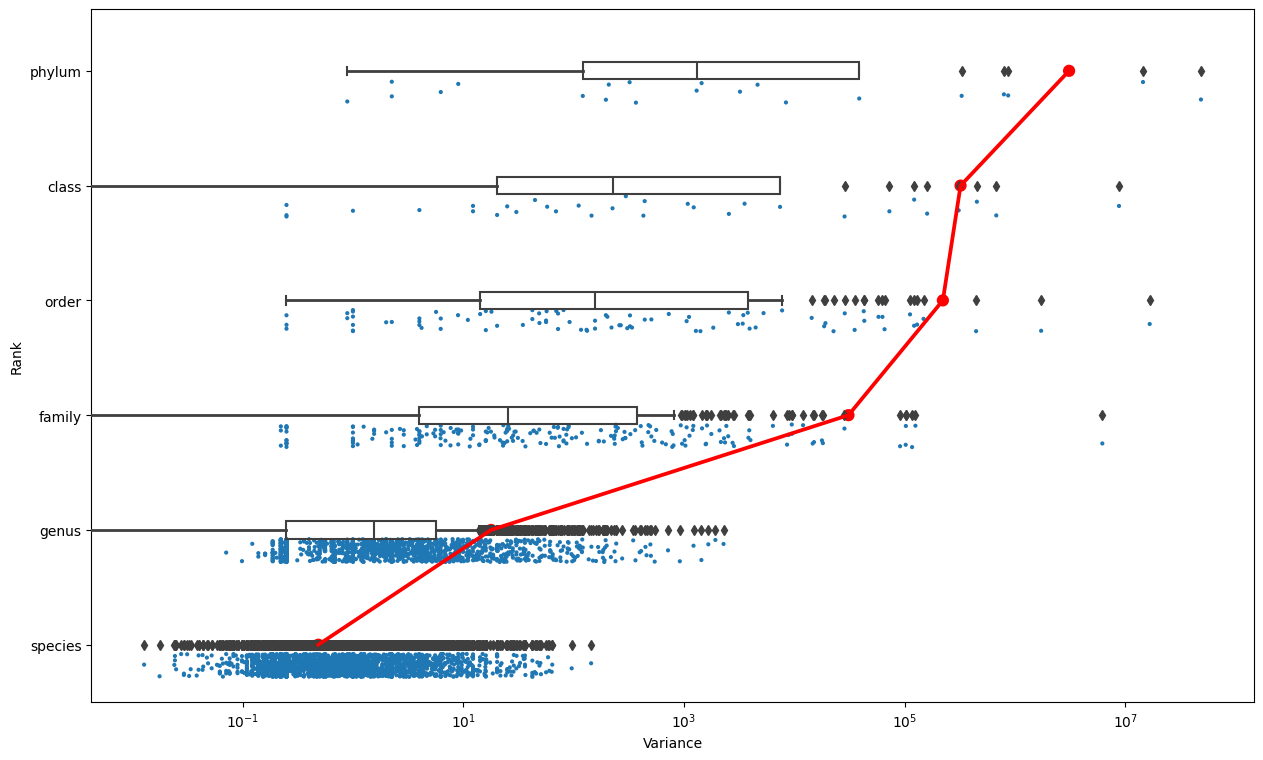

In [197]:
f, ax = plt.subplots(figsize=(15, 9))

from math import e

pal = sns.color_palette(n_colors=1)

dx = "Rank"; dy = "Variance"; ort = "h";

ax=pt.RainCloud(x = dx, y = dy, data = df, palette = pal,width_viol = .0,width_box = 0.15, ax = ax, orient = ort, move = .18,
                pointplot = True,dodge=True,offset=1000)

ax.set_xscale('log')



ax.figure.savefig('output_figure_3_A_Topic_10.png',dpi=1600)

In [5]:
# df2 = df2[df2.Variance != float('-inf')]

In [6]:
# df["Variance"].iloc[-1]